In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.metrics import *
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix
)


In [70]:
df = pd.read_csv('data.csv')

In [71]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

# 1. Data understanding

In [73]:
# Dataset shape
df.shape

(6819, 96)

In [74]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [75]:
# Datatypes of columns in dataset
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [76]:
# Target distribution of target coulmn
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [77]:
# Checking if dataset has any null values
pd.set_option('display.max_columns', None)
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [78]:
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

## Insights 
#### There is no null values

In [80]:
# Spliting the trainng and testing set for the model
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

In [81]:
X.shape

(6819, 95)

In [82]:
y.shape

(6819,)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. EDA

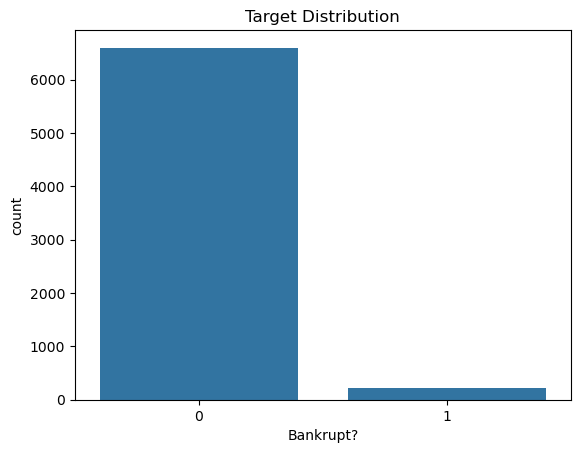

In [85]:
# 1. Class Imbalance

sns.countplot(x='Bankrupt?', data=df)

plt.title("Target Distribution")
plt.show()

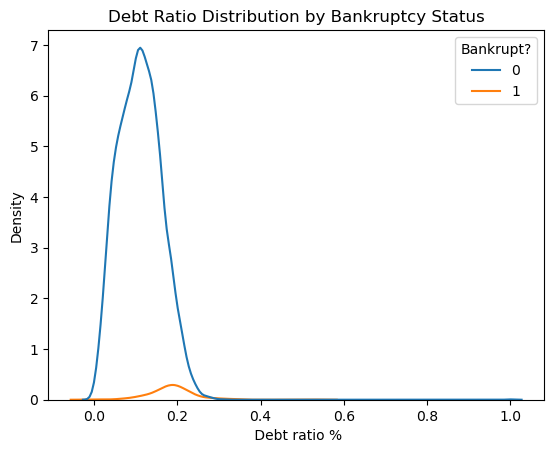

In [86]:
# 2. Key financial ratio
sns.kdeplot(data=df, x=' Debt ratio %', hue='Bankrupt?')
plt.title("Debt Ratio Distribution by Bankruptcy Status")
plt.show()


In [169]:
correlation_matrix = df.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

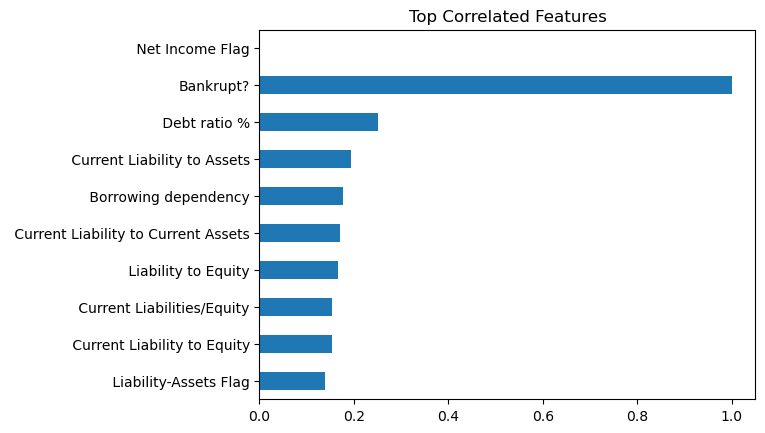

In [88]:
df.corr()['Bankrupt?'].sort_values().tail(10).plot(kind='barh')
plt.title("Top Correlated Features")
plt.show()


# 3. Modelling

In [90]:
# Before implement the model for training we need to balance the target variable because it is imbalanced


adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)


print("Original class distribution:", Counter(y_train))
print("After ADASYN:", Counter(y_resampled))

Original class distribution: Counter({0: 4631, 1: 142})
After ADASYN: Counter({1: 4690, 0: 4631})


## Logistic Regression:
### Logistic Regression is used because it is simple, fast, and highly interpretable, allowing us to clearly understand how each financial feature affects bankruptcy risk. It serves as a strong baseline model and helps explain risk decisions to business stakeholders.

In [92]:
# Train the model using logistic regression
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

C:\Users\Dharanitharan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# Evaluation

print('Accuracy: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.7639296187683284
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1968
           1       0.08      0.46      0.13        78

    accuracy                           0.76      2046
   macro avg       0.52      0.62      0.50      2046
weighted avg       0.94      0.76      0.84      2046



In [94]:
# Handle class imbalance (optional but recommended)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [95]:
# Initialize XGBoost model
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train model
model.fit(X_train, y_train)



C:\Users\Dharanitharan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [96]:

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [97]:
# Evaluation

print('Accuracy: ',accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy:  0.9613880742913001
Confusion Matrix:
[[1931   37]
 [  42   36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.49      0.46      0.48        78

    accuracy                           0.96      2046
   macro avg       0.74      0.72      0.73      2046
weighted avg       0.96      0.96      0.96      2046


ROC-AUC Score: 0.9375195434646654


# 4. Company risk profile output

### 4.a. PD

In [126]:
# Custom threshold
threshold = 0.30
y_preds = (y_prob >= threshold).astype(int)


### 4.b. Risk tier

In [128]:
def assign_risk_tier(pd):
    if pd < 0.05:
        return "A"
    elif pd < 0.10:
        return "B"
    elif pd < 0.20:
        return "C"
    else:
        return "D"


In [134]:
results = X_test.copy()

results['PD'] = y_prob
results['Risk_Tier'] = results['PD'].apply(assign_risk_tier)


### 4.c. Top reasons

In [144]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(3)['Feature'].tolist()

top_features


[' Total income/Total expense',
 ' Net Income to Total Assets',
 ' Non-industry income and expenditure/revenue']

In [167]:
results[['PD', 'Risk_Tier']]


PD Risk_Tier
239   0.000276         A
2850  0.000340         A
2687  0.000247         A
6500  0.552164         D
2684  0.008531         A
...        ...       ...
4315  0.000631         A
2228  0.000193         A
1083  0.000180         A
3355  0.000311         A
861   0.000397         A

[2046 rows x 2 columns]

# 5. Decision policy

Assume:
 *  EAD (Exposure at Default) = $10,000
 * LGD (Loss Given Default) = 60%
 *  ECL (Expected Credit Loss) = PD × LGD × EAD
 
Create a simple policy:
 * Approve if ECL < $X (choose X), OR
 * Approve the lowest-risk N% (choose N)
 
Report on the test set:
 * approval rate
 * total expected loss (sum of ECL for approved)
 * expected defaults estimate (sum of PD for approved)

In [149]:
EAD = 10000   # Exposure at Default
LGD = 0.6     # Loss Given Default


In [151]:
# ECL Calculation
results['ECL'] = results['PD'] * LGD * EAD


In [153]:
# CRedit decision score
results['Decision'] = results['ECL'].apply(
    lambda x: 'Approve' if x < 500 else 'Decline'
)


In [165]:
results

ROA(C) before interest and depreciation before interest  \
239                                            0.434456          
2850                                           0.542534          
2687                                           0.584897          
6500                                           0.436942          
2684                                           0.506898          
...                                                 ...          
4315                                           0.487739          
2228                                           0.517720          
1083                                           0.524204          
3355                                           0.576074          
861                                            0.516453          

       ROA(A) before interest and % after tax  \
239                                  0.481247   
2850                                 0.571413   
2687                                 0.631433   
6500                                 0.490951   
2684                                 0.565526   
...                                       ...   
4315                                 0.561164   
2228                                 0.570268   
1083                                 0.569341   
3355                                 0.640536   
861                                  0.572067   

       ROA(B) before interest and depreciation after tax  \
239                                            0.498742    
2850                                           0.590663    
2687                                           0.617057    
6500                                           0.482413    
2684                                           0.561754    
...                                                 ...    
4315                                           0.547727    
2228                                           0.563092    
1083                                           0.565716    
3355                                           0.645859    
861                                            0.559077    

       Operating Gross Margin   Realized Sales Gross Margin  \
239                  0.596326                      0.596326   
2850                 0.603417                      0.603417   
2687                 0.610567                      0.609954   
6500                 0.607987                      0.607951   
2684                 0.608693                      0.608693   
...                       ...                           ...   
4315                 0.608563                      0.609024   
2228                 0.601212                      0.601212   
1083                 0.610516                      0.610523   
3355                 0.618011                      0.618011   
861                  0.605565                      0.605515   

       Operating Profit Rate   Pre-tax net Interest Rate  \
239                 0.998791                    0.797012   
2850                0.999041                    0.797476   
2687                0.999079                    0.797542   
6500                0.998921                    0.797265   
2684                0.999103                    0.797538   
...                      ...                         ...   
4315                0.999035                    0.797432   
2228                0.999017                    0.797527   
1083                0.999106                    0.797563   
3355                0.999096                    0.797526   
861                 0.999057                    0.797496   

       After-tax net Interest Rate  \
239                       0.809041   
2850                      0.809375   
2687                      0.809422   
6500                      0.809187   
2684                      0.809447   
...                            ...   
4315                      0.809367   
2228                      0.809410   
1083                      0.809439   
3355                      0.809466   
861     

In [2]:
# Approval rate
approval_rate = (results['Decision'] == 'Approve').mean()
print('Approval rate',approval_rate)


NameError: name 'results' is not defined

In [159]:
# Total Expected Loss (Approved Only)
total_ecl = results.loc[
    results['Decision'] == 'Approve', 'ECL'
].sum()

print('Total Expected Loss (Approved Only)'total_ecl)


58874.734

In [163]:
# Expected Defaults (Approved Only)
expected_defaults = results.loc[
    results['Decision'] == 'Approve', 'PD'
].sum()

print('Expected Defaults (Approved Only)'expected_defaults)


9.812456